# Insights extracted from practical e-commerce data

* Sales figures of top 10 shops
* Sales figures over time
* Age groups of shoppers by shops
* Comparison age group between prospectives and real customers
* Top 3 keywords visualisation
* Log number by cycle
* Average of log number by cycle per user
* Top 5 users who have the most activities in the website
* Top 10 session duration
* Duration time by users
* Duration time by users with purchase
* Duration time by users without purchase

# Used modules

pandas, numpy, matplotlib, seaborn, sqlite3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

# korean font settings
plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)
sns.set_style('whitegrid')

# display settings

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# data settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Check out data

In [2]:
#Write your code here!

connect = sqlite3.connect("data/database.db")

#query = "SELECT * FROM sqlite_master"

#pd.read_sql(query, connect)

query = "SELECT * FROM 'order'"

eco_order = pd.read_sql(query, connect)
print(eco_order.shape)
eco_order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


# Q. Sales figures of top 10 shops

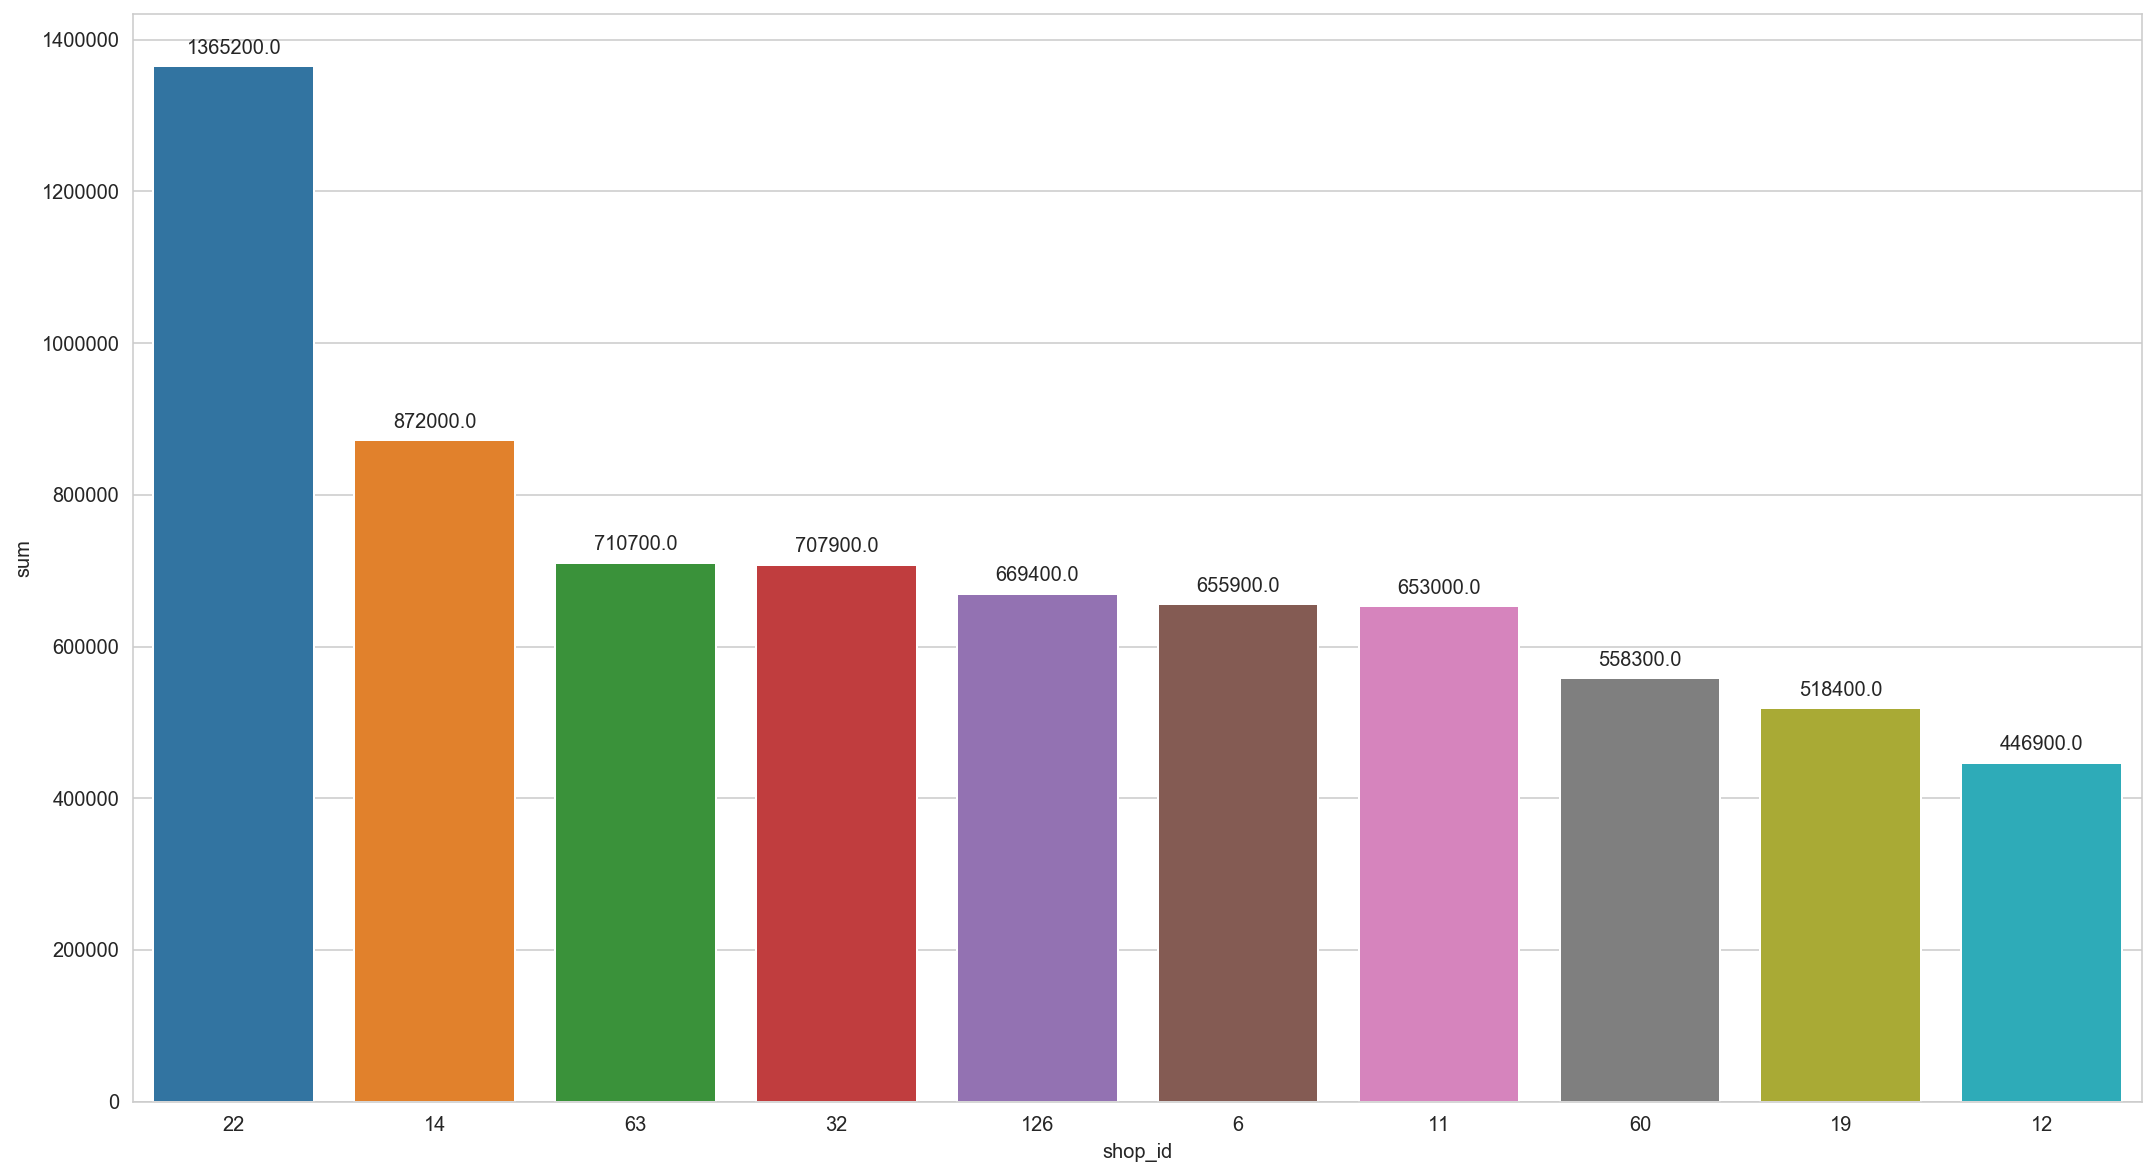

In [3]:
#Write your code here!
sales = pd.pivot_table(eco_order, index="shop_id", values="price", aggfunc=["sum","count"])

sales_graph = sales.sort_values(by=("sum","price"), ascending=False).head(10)
sales_graph.columns=["sum", "count"]

#sales_graph

sales_graph = sales_graph.sort_values(by="sum", ascending=False)


plt.figure(figsize=(18,10))
df_barplot = sns.barplot(data=sales_graph, x=sales_graph.index, y="sum", order=sales_graph.index)

# barplot annotation
for p in df_barplot.patches:
    df_barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Q. Sales figures over time

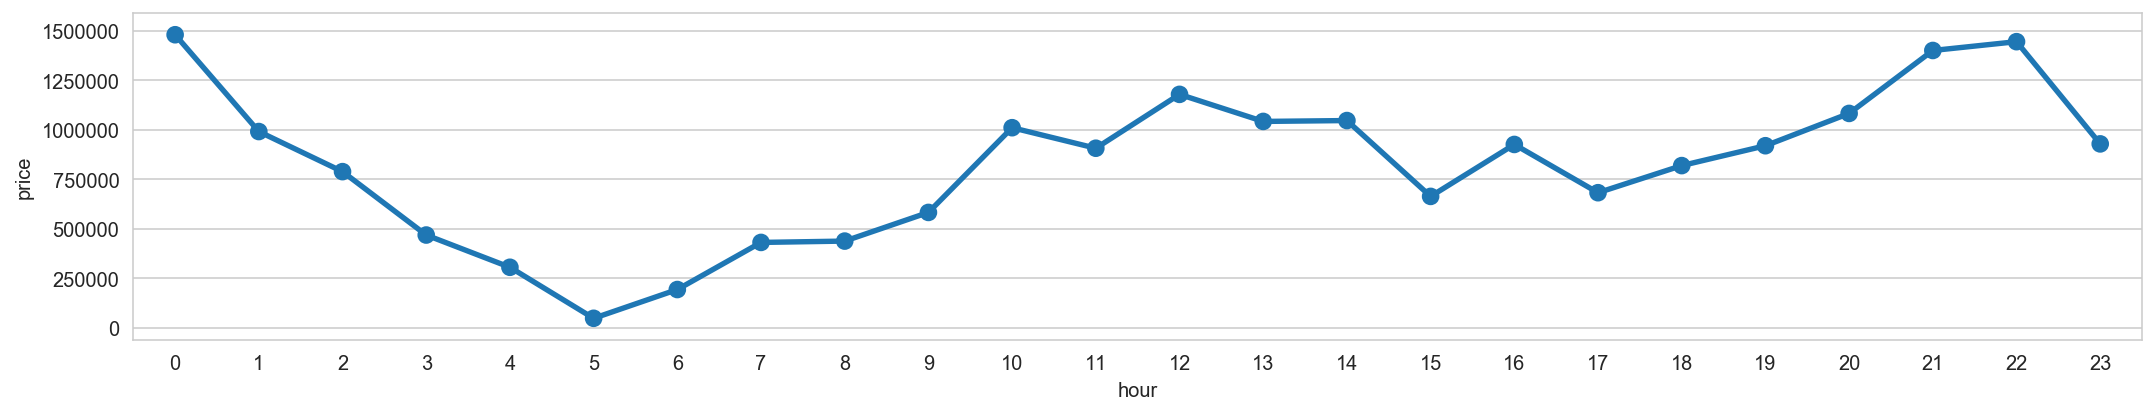

In [4]:
plt.figure(figsize=(18,3))
eco_order["timestamp"] = pd.to_datetime(eco_order["timestamp"])
eco_order["hour"] = eco_order["timestamp"].dt.hour
sales_figures_over_time = pd.pivot_table(data=eco_order, index="hour", values="price", aggfunc="sum")
sns.pointplot(data=sales_figures_over_time, x=sales_figures_over_time.index, y="price")

# Q. Age groups of shoppers by shops

### Merge user and order table in order to get user id, age and purchase log

In [5]:
query = "SELECT name FROM sqlite_master WHERE type = 'table'"
pd.read_sql(query, connect)

,name
0,order
1,good
2,shop
3,log
4,user


In [6]:
query = "SELECT * FROM 'user'"

eco_user = pd.read_sql(query, connect)
print(eco_user.shape)
eco_user.head()


(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [7]:
total_table1 = pd.merge(eco_order, eco_user, on="user_id", how="left")
total_table1.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


### Visualize age groups of shoppers by shops

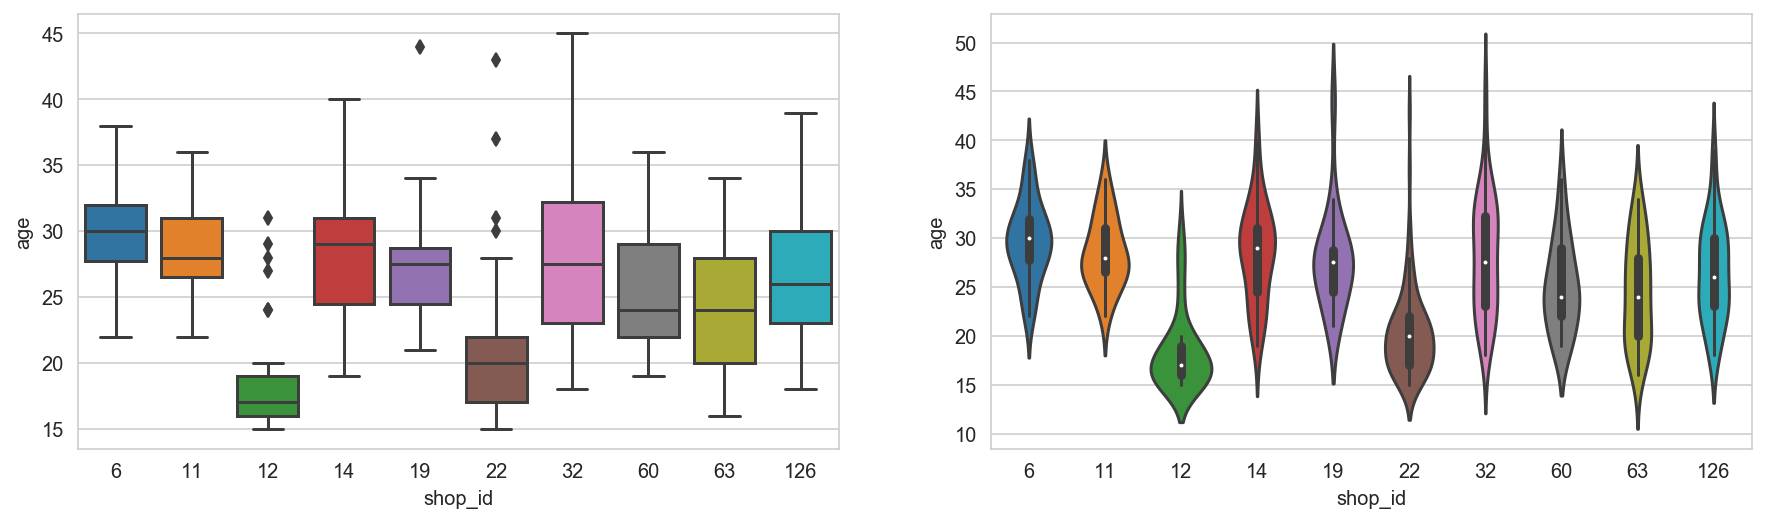

In [8]:
total_table1["age"] = total_table1["age"].replace(-1, 0)
top10_shops = pd.pivot_table(total_table1, index="shop_id", values="price", aggfunc="sum").sort_values(by="price", ascending=False).head(10)
top10_shop_id = top10_shops.index

total_table2 = total_table1.loc[(total_table1["shop_id"].isin(top10_shop_id)) & (total_table1["age"]!= 0),:]

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([15,4])

sns.boxplot(data=total_table2, x="shop_id",y="age", ax=ax1)
sns.violinplot(data=total_table2, x="shop_id",y="age", ax=ax2)


# Q. Comparison age group between prospectives and  real customers

### Create age group in user table

In [9]:
# age group : 10대 초중후, 20대 초중후, 30대 초중후 - 30대 후반 over 40
def age_group(row):
    if row == -1:
        return '미입력'
    elif row // 10 >= 4:
        return "30대 후반"
    elif row // 10 == 1:
        return "10대"
    elif row % 10 < 3:
        return str(row // 10 * 10) + f"대 초반"
    elif row % 10 <= 6:
        return str(row // 10 * 10) + f"대 중반"
    else:
        return str(row // 10 * 10) + f"대 후반"

    
    
eco_user["연령대"] = eco_user["age"].apply(age_group)
eco_user.head(5)

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


### Merge user, order, and shop table

In [10]:
query = "SELECT * FROM 'shop'"
eco_shop = pd.read_sql(query, connect)
tempMerge1 = pd.merge(eco_order, eco_user, on="user_id", how="left")
total_table2 = pd.merge(tempMerge1, eco_shop, on="shop_id", how="left")
total_table2.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,미입력,Marlene,의류,20대 초반/20대 중반/20대 후반,유니크/심플베이직
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,30대 중반,Elayne,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,10대,Margaret,의류,10대/20대 초반/20대 중반,빈티지/유니크


### Create comparision purchase age

In [11]:
def check_age_group(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])
    
total_table2["거래연령 일치여부"] = total_table2.apply(check_age_group, axis="columns")


total_table2_pivot = pd.pivot_table(total_table2, index="shop_id", values="거래연령 일치여부", aggfunc=["mean", "count"])
#total_table2_pivot.head()
total_table2_pivot[total_table2_pivot.index.isin(top10_shop_id)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


# Q. Top 3 keywords visualisation

### Preprocess keywords

In [12]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]


tempList = eco_shop["style"].str.split("/")

for i in style_list:
    #print(i)
    eco_shop[str(i)] = tempList.str.contains(str(i), regex=False, na=False)
    #print(eco_shop[str(i)].unique())
    
eco_shop.head()  

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


### Merge tables

In [13]:
total_table3 = (
    eco_order.merge(eco_shop, on='shop_id')
             .merge(eco_user, on='user_id')
)
print(total_table3.shape)
total_table3.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


In [14]:
print(total_table3["심플베이직"].value_counts())
print(total_table3["러블리"].value_counts())
print(total_table3["모던시크"].value_counts())

True     460
False    407
Name: 심플베이직, dtype: int64
False    496
True     371
Name: 러블리, dtype: int64
False    746
True     121
Name: 모던시크, dtype: int64


### Extract top 3 keywords

In [15]:
total_table3.pivot_table(index="style", values="price", aggfunc="sum").sort_values(by="price", ascending=False).head(3)
top3_keywords = ["심플베이직/러블리", "러블리/심플베이직", "모던시크/심플베이직"]


total_table3_temp = total_table3[["age_y","심플베이직", "러블리", "모던시크"]]
total_table3_simple = total_table3_temp.loc[total_table3_temp["심플베이직"]==True,"age_y"].to_frame()
total_table3_lovely = total_table3_temp.loc[total_table3_temp["러블리"]==True,"age_y"].to_frame()
total_table3_morden = total_table3_temp.loc[total_table3_temp["모던시크"]==True,"age_y"].to_frame()





### Visualise data

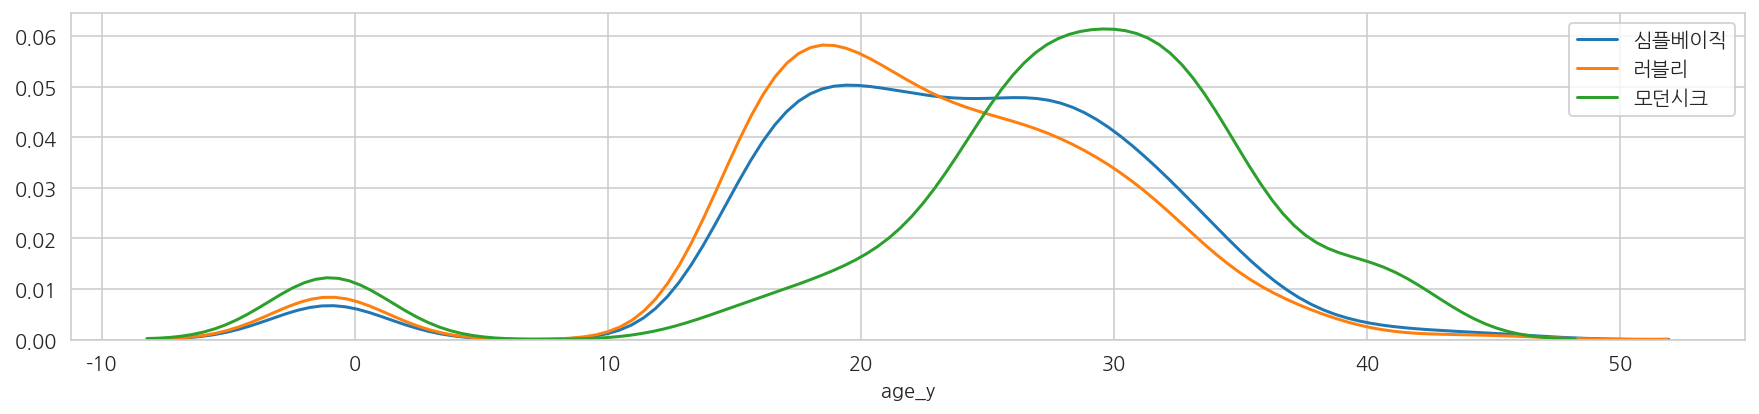

In [16]:
plt.figure(figsize=(15,3))
plt.rc("font", family="NanumGothic")

sns.distplot(total_table3_simple["age_y"], hist=False, label="심플베이직")
sns.distplot(total_table3_lovely["age_y"], hist=False, label="러블리")
sns.distplot(total_table3_morden["age_y"], hist=False, label="모던시크")

# Q. Log Data Analysis

## Log data preprocessing

In [17]:
query = "select * from 'log'"
eco_log = pd.read_sql(query,connect)
eco_log.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


### Create new column of log ID mapping to user ID

In [18]:
# Change timestamp type to datetime
eco_log["timestamp"] = pd.to_datetime(eco_log["timestamp"])

eco_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105815 entries, 0 to 105814
Data columns (total 6 columns):
timestamp         105815 non-null datetime64[ns]
user_id           105815 non-null object
event_origin      105815 non-null object
event_name        105815 non-null object
event_goods_id    18521 non-null float64
event_shop_id     21644 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.8+ MB


In [19]:
# Extract unique user_id from user table and give a index number to each user_id
user_id = eco_user["user_id"].unique()

print(len(user_id))

n_user_id = pd.Series(list(range(0, len(user_id))))
n_user_id

10000


0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
30        30
31        31
32        32
33        33
34        34
35        35
36        36
37        37
38        38
39        39
40        40
41        41
42        42
43        43
44        44
45        45
46        46
47        47
48        48
49        49
50        50
51        51
52        52
53        53
54        54
55        55
56        56
57        57
58        58
59        59
60        60
61        61
62        62
63        63
64        64
65        65
66        66
67        67
68        68
69        69
70        70
71        71
72        72
73        73
74        74
75        75
76        76

In [20]:
# map real user ID to new user ID and change the type to dictionary
id_zip = zip(user_id, n_user_id)
print(list(zip(user_id, n_user_id))[:5])

id_dict = dict(id_zip)
print(id_dict["K1d8_t3-QIskaSkrx32oAFu856D8JmLo"])

[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0), ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1), ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2), ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3), ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]
3314


In [21]:
# Add new column to each table
eco_order['n_user_id'] = eco_order['user_id'].map(id_dict)
eco_log['n_user_id'] = eco_log['user_id'].map(id_dict)
eco_user['n_user_id'] = eco_user['user_id'].map(id_dict)


eco_log[eco_log['user_id']=="K1d8_t3-QIskaSkrx32oAFu856D8JmLo"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3314
76,2018-06-11 00:00:34.463,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314
124,2018-06-11 00:00:52.829,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314
24251,2018-06-11 08:00:31.944,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,my_goods,app_page_view,NaN,NaN,3314
24257,2018-06-11 08:00:37.451,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314
24258,2018-06-11 08:00:38.650,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3314
24259,2018-06-11 08:00:39.313,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,my_goods,app_page_view,NaN,NaN,3314
24270,2018-06-11 08:00:51.445,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3314


In [22]:
eco_log[["user_id","n_user_id"]].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


### Find user ID who were written in log table and purchased a product

In [23]:
# used set to get unique list of user_id
temp_user = set(eco_order["user_id"])
user_number_order = len(temp_user)

temp_log = set(eco_log["user_id"])
user_number_log = len(temp_log)

# to find the duplicated users
user_duplicated = temp_user & temp_log


print('Total number of customer in the particular day :',user_number_order)
print('Total number of customer written on log in the particular day :',user_number_log)
print('Duplicated number of customer :', len(user_duplicated))

print(eco_order.columns)
print(eco_log.columns)

Total number of customer in the particular day : 832
Total number of customer written on log in the particular day : 9909
Duplicated number of customer : 742
Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [24]:
order_copy = eco_order.copy()
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]


# new columns
order_copy['event_origin'] = order_copy['shop_id']

order_copy['event_name'] = 'purchase'

order_copy['event_goods_id'] = order_copy['goods_id']


order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [25]:
log_order = pd.concat([order_copy, eco_log], axis="index")
log_order.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(106587, 8)

In [26]:
#log_order.head()
log_order["purchase"] = pd.notnull(log_order["price"])
log_order.sort_index()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,1414.0,purchase,38,NaN,6241,45000.0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,True
0,NaN,app_page_view,shops_ranking,NaN,3314,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,1351.0,purchase,12,NaN,8899,9500.0,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,True
1,NaN,app_page_view,shops_bookmark,NaN,7844,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,7920,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,3314,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,5572.0,purchase,89,NaN,7832,29000.0,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,True
4,NaN,app_page_view,shops_bookmark,NaN,5608,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False
5,NaN,app_page_view,my_goods,NaN,3548,NaN,2018-06-11 00:00:01.601,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,False
5,55.0,purchase,22,NaN,2745,11200.0,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,True


In [27]:
log_order = log_order.sort_values(by=["user_id", "timestamp"], ascending=True).reset_index().drop("index", axis="columns")
log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


### Get page duration from log table

In [28]:
log_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106587 entries, 0 to 106586
Data columns (total 9 columns):
event_goods_id    19293 non-null float64
event_name        106587 non-null object
event_origin      106587 non-null object
event_shop_id     21644 non-null float64
n_user_id         106587 non-null int64
price             772 non-null float64
timestamp         106587 non-null datetime64[ns]
user_id           106587 non-null object
purchase          106587 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.6+ MB


In [29]:
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608


In [30]:
log_order['log_duration'] = (log_order['timestamp_after'] - log_order['timestamp']).fillna(pd.Timedelta(seconds=0))

log_order[['timestamp','timestamp_after','log_duration']].head()

,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


### Change the log duration to seconds

In [31]:
log_order["log_duration"] = log_order["log_duration"].map(lambda x:x.total_seconds())
log_order["log_duration"] = log_order["log_duration"].astype(float)
log_order[["n_user_id","timestamp", "timestamp_after", "log_duration"]].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


### Define purchase cycle
* two conditions below are satisfied for customer to be out:
  * log_duration is 0, it is the last log of that day
  * log_duration is over 40mins, one purchase cycle is finished
  
* daily cycle: count up per user
* idx cycle: count up per cycle, reset the number by user

In [32]:

log_order2 = log_order[["user_id", "n_user_id","timestamp", "timestamp_after", "log_duration"]]
log_order2.head(100)

def platformIsOut(temp):
    standardSec = 60 * 40
    if temp["log_duration"] >= standardSec:
        return True
    elif temp["log_duration"] == 0:
        return True
    else:
        return False
    
def platformDuration(temp):
    if temp["is_out"] ==True:
        return 0
    else:
        return temp["log_duration"]

log_order2["is_out"] = log_order2.apply(platformIsOut, axis="columns")
log_order2["log_duration"] = log_order2.apply(platformDuration, axis="columns")

#log_order2.loc[log_order2["is_out"] == True,"log_duration"]
log_order2[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


In [33]:
# isout == True, then count up
log_order2['cycle_idx_unique'] = (log_order2['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order2[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,2


In [34]:
log_order2['cycle_idx_daily'] = (log_order2.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# first cycle_idx_daily is changed to 0 from 1
head_index = log_order2.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order2.loc[head_index, 'cycle_idx_daily'] = 0

log_order2[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_unique','cycle_idx_daily']].head(80)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,1,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,1,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,1,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1,0
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,2,0


## Visualise insight from all tables including log data

### Log number by cycle

In [35]:
cycle_log_count = (log_order2
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size() 
                 .reset_index()  
                 .rename(columns = { 0 : "log_count"} ) 
                )

cycle_log_count_graph = cycle_log_count.sort_values(by=["log_count", "cycle_idx_daily"], ascending=False).head(10)
cycle_log_count_graph

,n_user_id,cycle_idx_daily,log_count
2212,1280,3,191
13417,7818,0,161
1958,1135,0,151
3017,1768,0,134
6359,3675,0,108
15330,8955,0,108
395,210,0,102
12331,7157,0,101
2468,1435,0,97
7218,4165,0,96


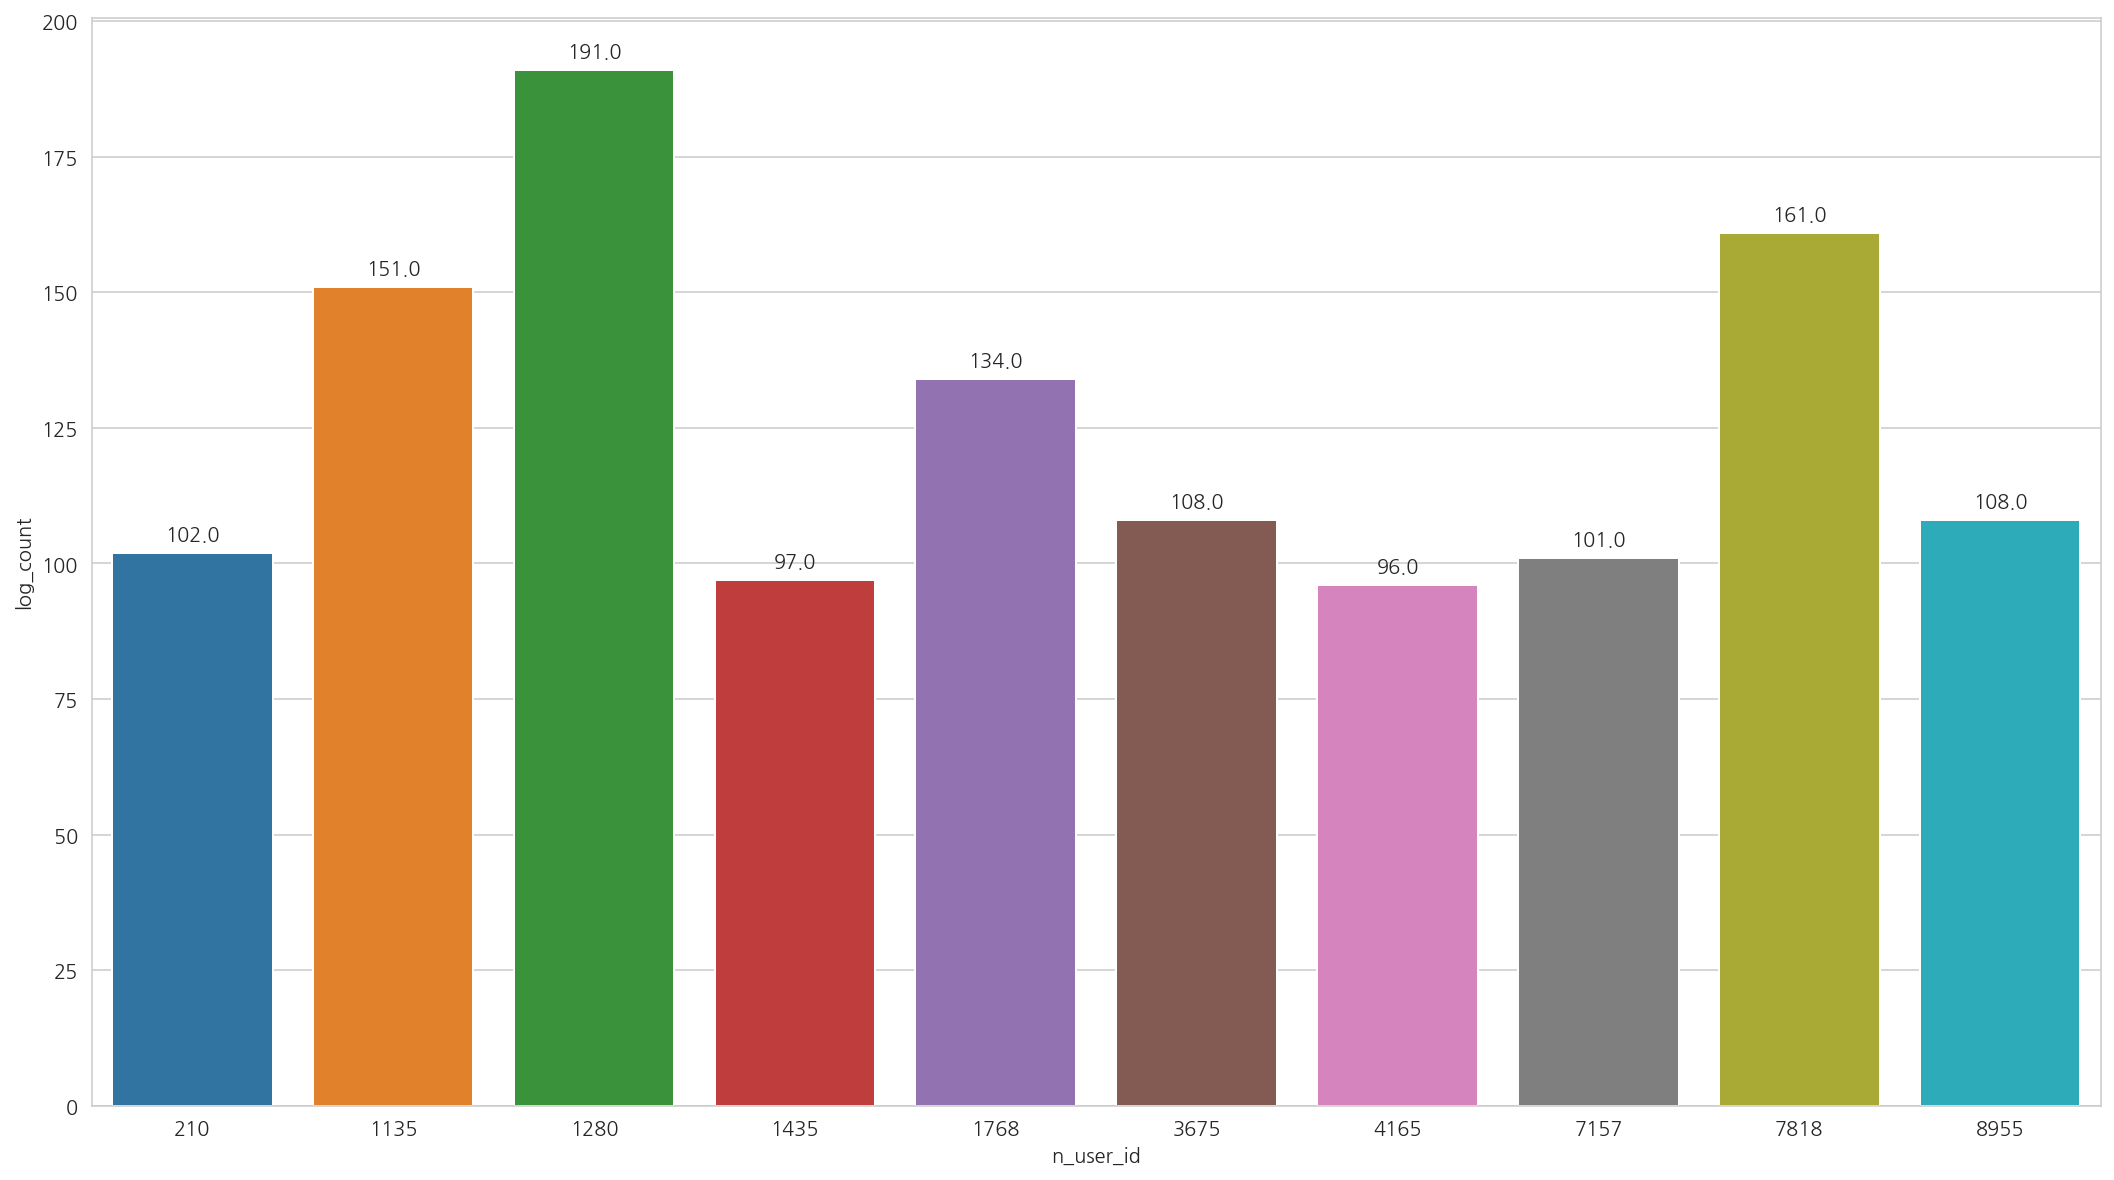

In [36]:
plt.figure(figsize=(18,10))
df_barplot = sns.barplot(data=cycle_log_count_graph, x="n_user_id", y="log_count")
df_barplot

# barplot annotation
for p in df_barplot.patches:
    df_barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### Average of log number by cycle per user

In [37]:
cycle_user_log_count = pd.pivot_table(cycle_log_count, index="n_user_id", values="log_count", aggfunc="mean").reset_index()

cycle_user_log_count = cycle_user_log_count.rename(columns={"log_count":"log_count_mean"})

cycle_user_log_count_graph = cycle_user_log_count.sort_values("log_count_mean", ascending=False).head(10)
cycle_user_log_count_graph.head()

,n_user_id,log_count_mean
1123,1135,151.0
1421,1435,97.0
4181,4215,81.0
6085,6140,81.0
3643,3675,76.0


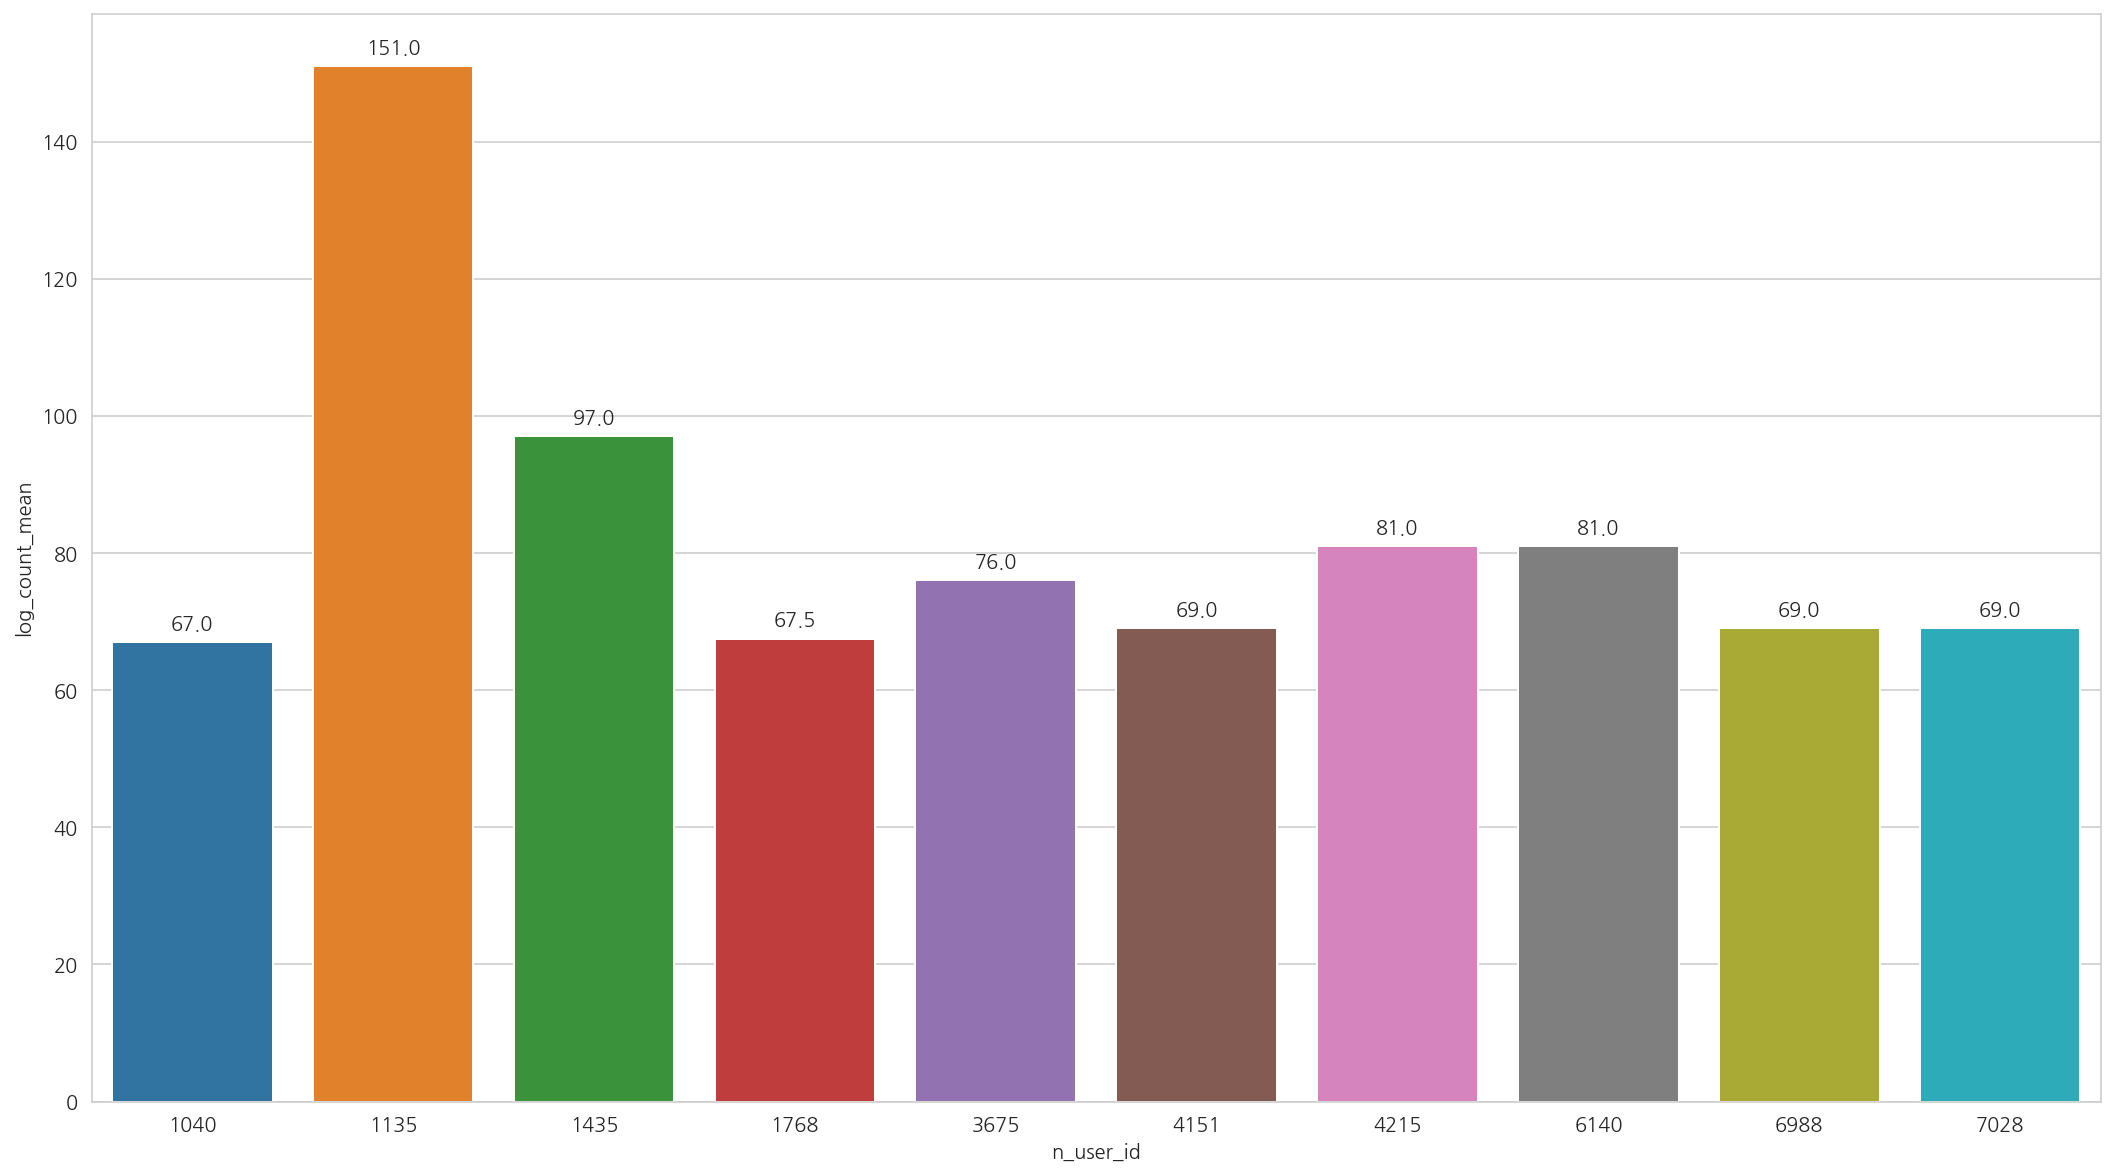

In [38]:
plt.figure(figsize=(18,10))
df_barplot = sns.barplot(data=cycle_user_log_count_graph, x="n_user_id", y="log_count_mean")
df_barplot

# barplot annotation
for p in df_barplot.patches:
    df_barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### Top 5 users who have the most activities in the website

In [39]:
top5_cycle = ( cycle_log_count
                 .groupby(["n_user_id"])['cycle_idx_daily']
                 .nunique()
                 .sort_values()
                 .tail()
            )

top5_cycle.head()

n_user_id
6234     9
2424     9
2249    10
6010    10
5847    11
Name: cycle_idx_daily, dtype: int64

### Top 10 session duration

In [40]:
duration_time_cycle = (log_order2.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'duration_time'})
                       )

duration_time_cycle.head(10)

,n_user_id,cycle_idx_daily,duration_time
0,0,0,114.890
1,1,0,1011.541
2,2,0,893.742
3,2,1,69.618
4,2,2,3075.422
5,3,0,0.000
6,3,1,45.911
7,3,2,85.183
8,3,3,1711.031
9,4,0,49.130


### Q. Duration time by users

In [41]:
duration_time_by_users = duration_time_cycle.groupby("n_user_id")['duration_time'].mean()

duration_time_by_users.to_frame().head()

,duration_time
n_user_id,
0,114.890000
1,1011.541000
2,1346.260667
3,460.531250
4,49.130000


In [42]:
log_order_temp1 = log_order[["n_user_id","price", "purchase"]]
log_order_temp2 = log_order2

total_table4 = log_order_temp2.merge(log_order_temp1, on=log_order_temp1.index, how="inner")
total_table4.head(20)


cycle_purchase = total_table4[total_table4["purchase"]==True]["cycle_idx_unique"]
cycle_purchase = cycle_purchase.fillna(0).astype(int)
cycle_purchase.head()

56      4
123    15
144    16
214    19
530    88
Name: cycle_idx_unique, dtype: int32

### Q. Duration time by users with purchase

In [43]:
data_purchase = total_table4.loc[total_table4['cycle_idx_unique'].isin(cycle_purchase)]

data_purchase.head()

,key_0,user_id,n_user_id_x,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily,n_user_id_y,price,purchase
26,26,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,2,2018-06-11 22:27:56.017,2018-06-11 22:27:58.920,2.903,False,4,2,2,NaN,False
27,27,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,2,2018-06-11 22:27:58.920,2018-06-11 22:27:59.632,0.712,False,4,2,2,NaN,False
28,28,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,2,2018-06-11 22:27:59.632,2018-06-11 22:28:04.500,4.868,False,4,2,2,NaN,False
29,29,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,2,2018-06-11 22:28:04.500,2018-06-11 22:28:10.860,6.360,False,4,2,2,NaN,False
30,30,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,2,2018-06-11 22:28:10.860,2018-06-11 22:28:37.770,26.910,False,4,2,2,NaN,False


In [44]:
data_purchase2 = data_purchase.groupby(["n_user_id_x", "cycle_idx_unique"])["log_duration"].sum().to_frame().reset_index().rename(columns={"n_user_id_x":"n_user_id"})
data_purchase2.head(10)

,n_user_id,cycle_idx_unique,log_duration
0,2,4,3075.422
1,8,15,412.025
2,8,16,1791.231
3,9,19,1657.393
4,47,88,3116.367
5,49,92,2615.611
6,65,123,3093.858
7,86,168,1906.721
8,97,192,3031.770
9,117,232,1191.110


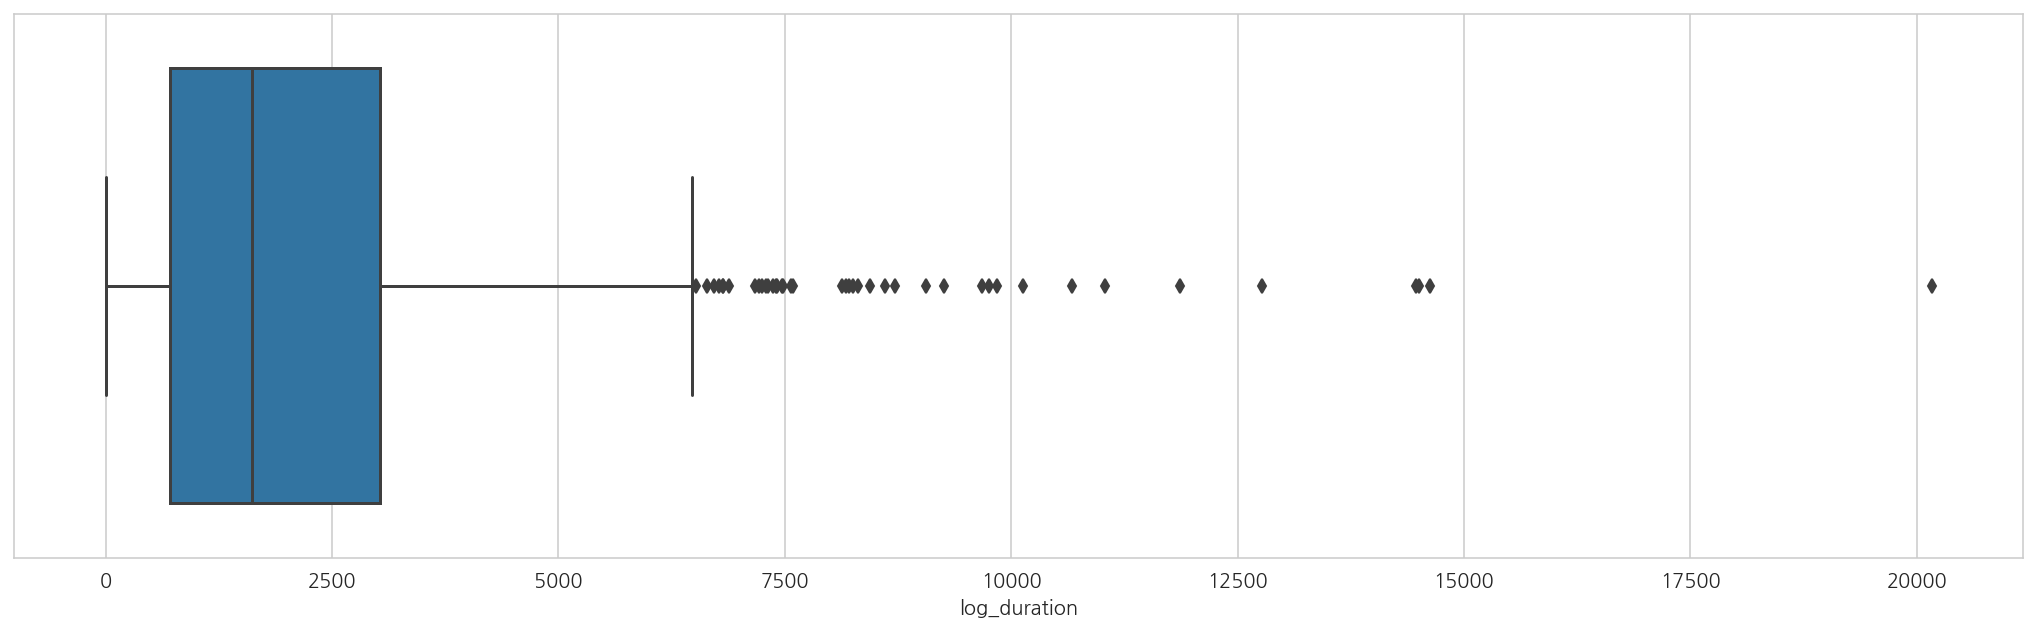

In [45]:
plt.figure(figsize=(18,5))
sns.boxplot(data=data_purchase2, x="log_duration")

In [46]:
print("Average duration time for purchase users : " + str(data_purchase2["log_duration"].mean()))

Average duration time for purchase users : 2280.0800799999997


### Q. Duration time by users without purchase

In [47]:
data_npurchase = total_table4.loc[~total_table4['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase.head()

,key_0,user_id,n_user_id_x,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily,n_user_id_y,price,purchase
0,0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0,0,0,NaN,False
1,1,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,0,2018-06-11 15:59:05.505,NaT,0.000,True,0,0,0,NaN,False
2,2,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1,0,1,NaN,False
3,3,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1,0,1,NaN,False
4,4,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1,0,1,NaN,False


In [48]:
data_npurchase2 = data_npurchase.groupby(["n_user_id_x", "cycle_idx_unique"])["log_duration"].sum().to_frame().reset_index().rename(columns={"n_user_id_x":"n_user_id"})
data_npurchase2.head(10)

,n_user_id,cycle_idx_unique,log_duration
0,0,0,114.890
1,1,1,1011.541
2,2,2,893.742
3,2,3,69.618
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


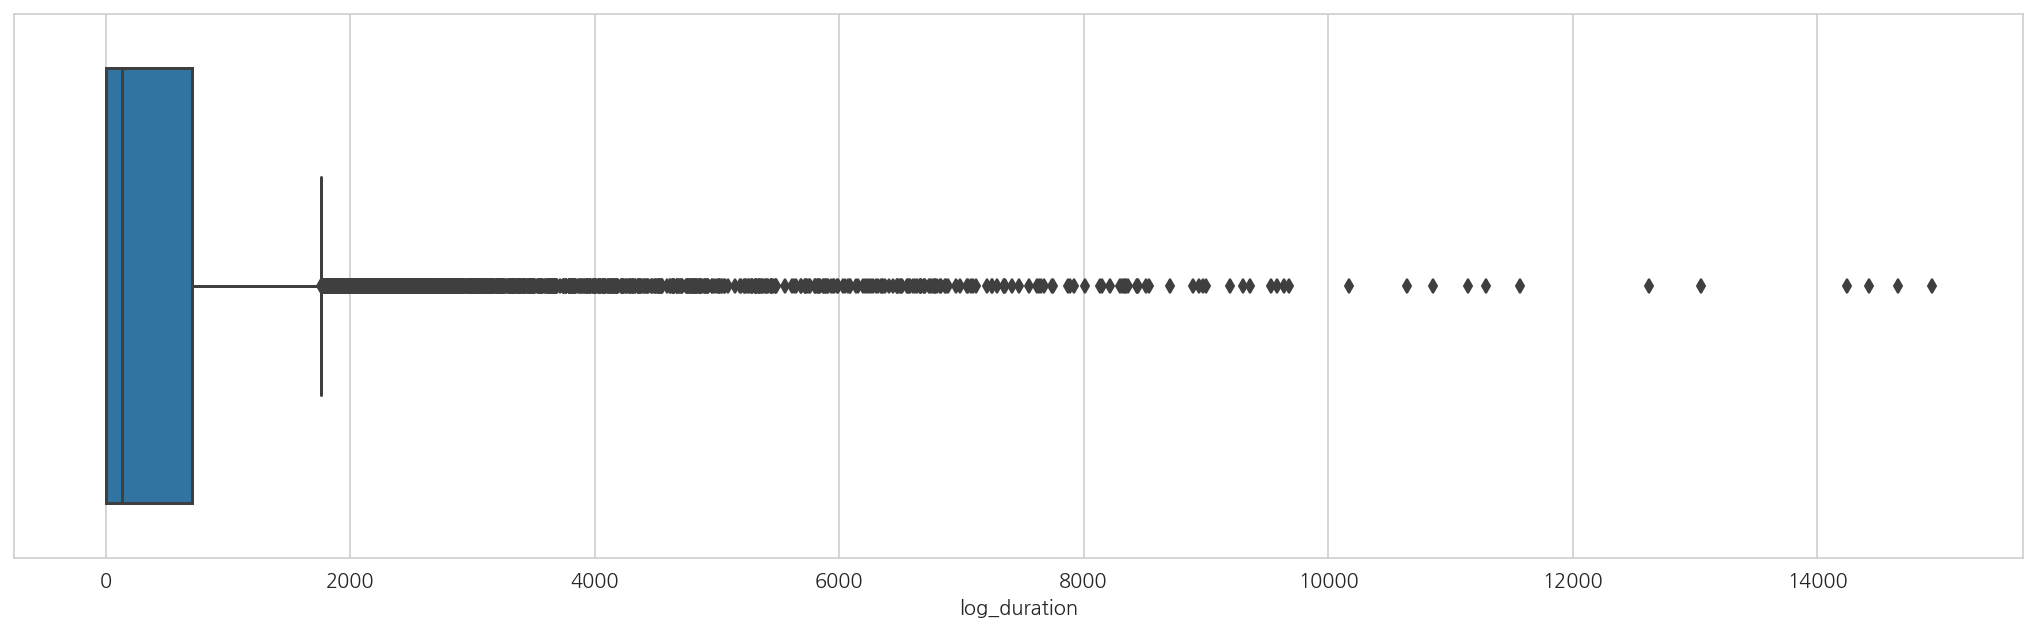

In [49]:
plt.figure(figsize=(18,5))
sns.boxplot(data=data_npurchase2, x="log_duration")

In [50]:
print("Average duration time for non-purchase users : " + str(data_npurchase2["log_duration"].mean()))

Average duration time for non-purchase users : 611.9902027010454
